# Abell 2255 Analysis

Abell 225 is a galaxy cluster located at approx. RA = 258.1292, DEC = 64.0925

We have already added all objects from the approximate location of Abell 2255 into data/sdss_data.csv

### Imports

In [17]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
from IPython.display import FileLink, FileLinks

### Data Handling

I removed all entries that do not have type=3. Type=3 is for galaxies and type=6 is stars.

In [18]:
color = pd.read_csv("../data/color_data.csv")
redshift = pd.read_csv("../data/redshift_data.csv")

data = pd.merge(color, redshift, left_on='objID', right_on='bestObjID', how='outer')
data = data[data.type == 3]
data['u_g'] = data['modelMag_u'] - data['modelMag_g']
data['g_r'] = data['modelMag_g'] - data['modelMag_r']

Some of this data appears to be a bit scattered. I think some of these galaxies are in front/behind our targeted cluster. Maybe culling galaxies with very dissimilar redshifts will make the data better. Right now it is commented out but remove the # if you want to cull the galaxies with weird z-values.

In [28]:
data = data[((data.z > .06) & (data.z < .09))]


I guess there is a lot of galaxies that do not have z values so much culling was not as useful as anticipated.

### Export Data
Just in case anyone wants to download the data themselves. This will send you to a page with the raw data. When you get there hit raw then right click and save as.

In [29]:
data.to_csv('../exports/abell2255.csv')
FileLink('../exports/abell2255.csv')

/Users/noahcitron/Desktop/Abell-2255-analysis/exports/abell2255.csv

### Generate Graph and Analyze Data

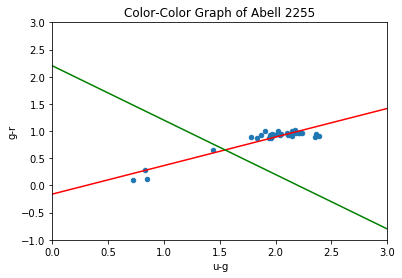

In [30]:
plt.scatter(x=data.u_g, y=data.g_r, s=20)
plt.xlim(0,3)
plt.ylim(-1,3)
plt.xlabel("u-g")
plt.ylabel("g-r")
b, m = polyfit(data.u_g, data.g_r, 1)
x = np.array([-10,10])
plt.plot(x, m*x+b, c='red')
plt.plot(x, (-1)*x + 2.2, c='green')
plt.title("Color-Color Graph of Abell 2255")
plt.show()

The red line in this graph shows the best fit line of this data. The green line is a imperically derived equation for seperating elliptical and spiral galxies. Most elliptical galxies will be above this line and most spirals below. More info on this can be found at http://skyserver.sdss.org/dr6/en/proj/advanced/galaxies/separator.asp

In [16]:
spiral = 0
elliptical = 0
for index, galaxy in data.iterrows():
    if (galaxy['u_g'] * (-1) + 2.2) > galaxy['g_r']:
        spiral+=1
    if (galaxy['u_g'] * (-1) + 2.2) < galaxy['g_r']:
        elliptical+=1
print("Spirals: " + str(spiral) + " (" + str(round((spiral*100)/(spiral+elliptical), 2)) + "%) ")
print("Ellipticals: " + str(elliptical) + " (" + str(round((elliptical*100)/(spiral+elliptical), 2)) + "%) ")

Spirals: 4 (12.5%) 
Ellipticals: 28 (87.5%) 
